In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
%pwd

'/home/kyudan/AnomLLM/notebook'

In [3]:
%cd ..
%cd src

/home/kyudan/AnomLLM
/home/kyudan/AnomLLM/src


In [4]:
%pwd

'/home/kyudan/AnomLLM/src'

In [5]:
from prompt import time_series_to_image
from utils import view_base64_image, display_messages, collect_results
from data.synthetic import SyntheticDataset

data_name = 'point'
data_dir = f'/home/kyudan/AnomLLM/data/synthetic/{data_name}/eval/'
train_dir = f'/home/kyudan/AnomLLM/data/synthetic/{data_name}/train/'
eval_dataset = SyntheticDataset(data_dir)
eval_dataset.load()
train_dataset = SyntheticDataset(train_dir)
train_dataset.load()

Loaded dataset point with 400 series.
Loaded dataset point with 400 series.


In [6]:
from utils import plot_series_and_predictions
from utils import view_base64_image, display_messages, collect_results
idx = 0
directory = f'/home/kyudan/AnomLLM/results/synthetic/{data_name}'
series = eval_dataset[idx][1].numpy() # eval dataset의 문제 series.
anomaly_locations = eval_dataset[idx][0].numpy() # eval dataset의 gt가 될 것.

raw_results = collect_results(directory, raw=True)
raw_results = {k: v[idx] for k, v in raw_results.items()}


In [7]:
anomaly_locations

array([[[485., 500.]]], dtype=float32)

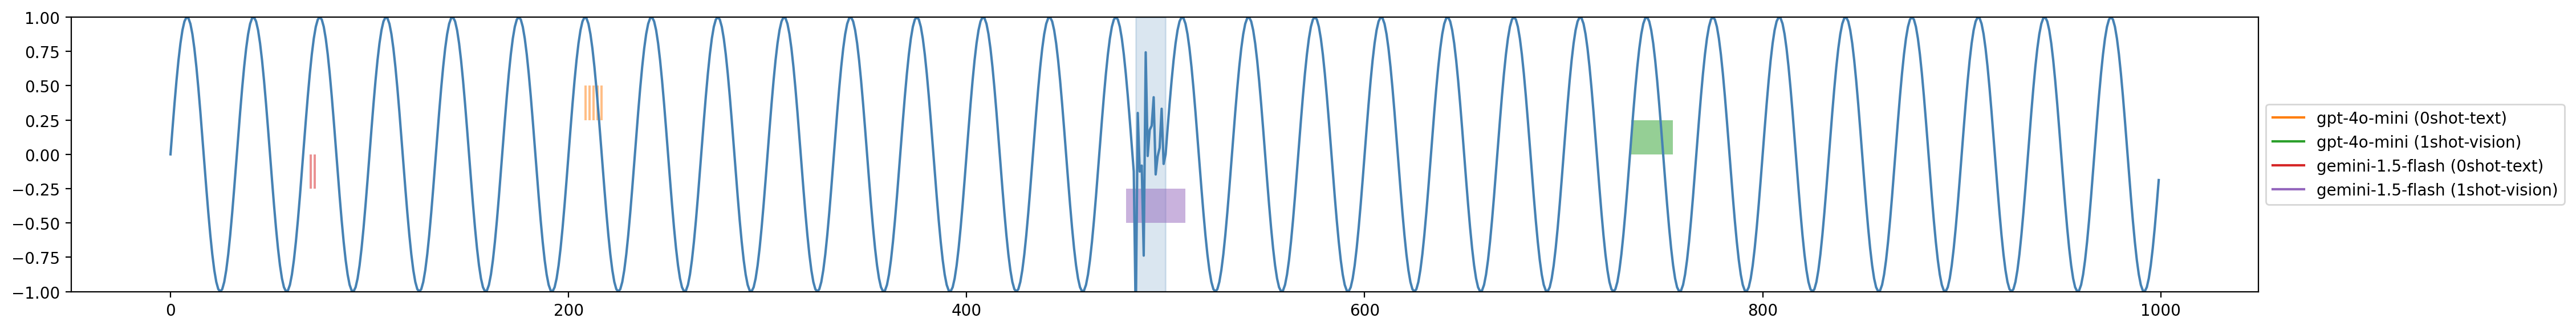

In [8]:
results = collect_results(directory)
results = {k: v[idx] for k, v in results.items()}

fig = plot_series_and_predictions(
    series=series, 
    gt_anomaly_intervals=anomaly_locations,
    anomalies=results
)

In [9]:
from utils import display_messages

display_messages(raw_results['gpt-4o-mini (0shot-text)']['request']['messages'])

In [10]:
raw_results['gpt-4o-mini (0shot-text)']

{'custom_id': 'point_gpt-4o-mini_0shot-text_00001',
 'request': {'messages': [{'role': 'user',
    'content': [{'type': 'text',
      'text': '0.0 0.19 0.37 0.54 0.68 0.81 0.9 0.97 1.0 0.99 0.95 0.88 0.77 0.64 0.48 0.31 0.13 -0.06 -0.25 -0.43 -0.59 -0.73 -0.84 -0.93 -0.98 -1.0 -0.98 -0.93 -0.84 -0.73 -0.59 -0.43 -0.25 -0.06 0.13 0.31 0.48 0.64 0.77 0.88 0.95 0.99 1.0 0.97 0.9 0.81 0.68 0.54 0.37 0.19 0.0 -0.19 -0.37 -0.54 -0.68 -0.81 -0.9 -0.97 -1.0 -0.99 -0.95 -0.88 -0.77 -0.64 -0.48 -0.31 -0.13 0.06 0.25 0.43 0.59 0.73 0.84 0.93 0.98 1.0 0.98 0.93 0.84 0.73 0.59 0.43 0.25 0.06 -0.13 -0.31 -0.48 -0.64 -0.77 -0.88 -0.95 -0.99 -1.0 -0.97 -0.9 -0.81 -0.68 -0.54 -0.37 -0.19 -0.0 0.19 0.37 0.54 0.68 0.81 0.9 0.97 1.0 0.99 0.95 0.88 0.77 0.64 0.48 0.31 0.13 -0.06 -0.25 -0.43 -0.59 -0.73 -0.84 -0.93 -0.98 -1.0 -0.98 -0.93 -0.84 -0.73 -0.59 -0.43 -0.25 -0.06 0.13 0.31 0.48 0.64 0.77 0.88 0.95 0.99 1.0 0.97 0.9 0.81 0.68 0.54 0.37 0.19 0.0 -0.19 -0.37 -0.54 -0.68 -0.81 -0.9 -0.97 -1.0 -0.99 -0

In [29]:
raw_text = raw_results['gpt-4o-mini (0shot-text)']['request']['messages'][0]['content'][0]['text']
data_part = raw_text.split("\n\n")[0]
data_part_list = data_part.split(' ')

idx_data_list  = []
for i, data in enumerate(data_part_list):
    idx_data_list.append(f"({i},{data})")
idx_data = ', '.join([item.strip("'") for item in idx_data_list])
idx_data

'(0,0.0), (1,0.19), (2,0.37), (3,0.54), (4,0.68), (5,0.81), (6,0.9), (7,0.97), (8,1.0), (9,0.99), (10,0.95), (11,0.88), (12,0.77), (13,0.64), (14,0.48), (15,0.31), (16,0.13), (17,-0.06), (18,-0.25), (19,-0.43), (20,-0.59), (21,-0.73), (22,-0.84), (23,-0.93), (24,-0.98), (25,-1.0), (26,-0.98), (27,-0.93), (28,-0.84), (29,-0.73), (30,-0.59), (31,-0.43), (32,-0.25), (33,-0.06), (34,0.13), (35,0.31), (36,0.48), (37,0.64), (38,0.77), (39,0.88), (40,0.95), (41,0.99), (42,1.0), (43,0.97), (44,0.9), (45,0.81), (46,0.68), (47,0.54), (48,0.37), (49,0.19), (50,0.0), (51,-0.19), (52,-0.37), (53,-0.54), (54,-0.68), (55,-0.81), (56,-0.9), (57,-0.97), (58,-1.0), (59,-0.99), (60,-0.95), (61,-0.88), (62,-0.77), (63,-0.64), (64,-0.48), (65,-0.31), (66,-0.13), (67,0.06), (68,0.25), (69,0.43), (70,0.59), (71,0.73), (72,0.84), (73,0.93), (74,0.98), (75,1.0), (76,0.98), (77,0.93), (78,0.84), (79,0.73), (80,0.59), (81,0.43), (82,0.25), (83,0.06), (84,-0.13), (85,-0.31), (86,-0.48), (87,-0.64), (88,-0.77), (8

In [30]:
raw_text = raw_results['gpt-4o-mini (0shot-text)']

In [31]:
raw_text

{'custom_id': 'point_gpt-4o-mini_0shot-text_00001',
 'request': {'messages': [{'role': 'user',
    'content': [{'type': 'text',
      'text': '0.0 0.19 0.37 0.54 0.68 0.81 0.9 0.97 1.0 0.99 0.95 0.88 0.77 0.64 0.48 0.31 0.13 -0.06 -0.25 -0.43 -0.59 -0.73 -0.84 -0.93 -0.98 -1.0 -0.98 -0.93 -0.84 -0.73 -0.59 -0.43 -0.25 -0.06 0.13 0.31 0.48 0.64 0.77 0.88 0.95 0.99 1.0 0.97 0.9 0.81 0.68 0.54 0.37 0.19 0.0 -0.19 -0.37 -0.54 -0.68 -0.81 -0.9 -0.97 -1.0 -0.99 -0.95 -0.88 -0.77 -0.64 -0.48 -0.31 -0.13 0.06 0.25 0.43 0.59 0.73 0.84 0.93 0.98 1.0 0.98 0.93 0.84 0.73 0.59 0.43 0.25 0.06 -0.13 -0.31 -0.48 -0.64 -0.77 -0.88 -0.95 -0.99 -1.0 -0.97 -0.9 -0.81 -0.68 -0.54 -0.37 -0.19 -0.0 0.19 0.37 0.54 0.68 0.81 0.9 0.97 1.0 0.99 0.95 0.88 0.77 0.64 0.48 0.31 0.13 -0.06 -0.25 -0.43 -0.59 -0.73 -0.84 -0.93 -0.98 -1.0 -0.98 -0.93 -0.84 -0.73 -0.59 -0.43 -0.25 -0.06 0.13 0.31 0.48 0.64 0.77 0.88 0.95 0.99 1.0 0.97 0.9 0.81 0.68 0.54 0.37 0.19 0.0 -0.19 -0.37 -0.54 -0.68 -0.81 -0.9 -0.97 -1.0 -0.99 -0